In [ ]:
# IMDBをカレントフォルダにダウンロード
# !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# # 解凍
# !tar zxf aclImdb_v1.tar.gz
# # aclImdb/train/unsupはラベル無しのため削除
# !rm -rf aclImdb/train/unsup
# # IMDBデータセットの説明を表示
# !cat aclImdb/README

In [8]:
from sklearn.datasets import load_files
train_review = load_files('/Users/takahashihideyuki/dive/データ格納/Sprint 自然言語処理入門/aclImdb/train/', encoding='utf-8')
x_train_imdb, y_train_imdb = train_review.data, train_review.target
test_review = load_files('/Users/takahashihideyuki/dive/データ格納/Sprint 自然言語処理入門/aclImdb/test/', encoding='utf-8')
x_test_imdb, y_test_imdb = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [19]:
print("x : {}".format(x_train_imdb[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


# BoW

In [10]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [6]:
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# 【問題1】BoWのスクラッチ実装
以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。

This movie is SOOOO funny!!!<br>
What a movie! I never<br>
best movie ever!!!!! this movie<br>


In [12]:
import re
import numpy as np

In [2]:
text = ["This movie is SOOOO funny!!!", 
              "What a movie! I never",
              "best movie ever!!!!! this movie"]

In [9]:
#小文字にする
text_lower = [i.lower() for i in text] 
text_lower

['this movie is soooo funny!!!',
 'what a movie! i never',
 'best movie ever!!!!! this movie']

In [10]:
#!を削除
p = re.compile('(!)')
text_del = [p.sub('', i) for i in text_lower]
text_del

['this movie is soooo funny',
 'what a movie i never',
 'best movie ever this movie']

In [11]:
#スペースで単語を分割
text_split = [re.split(' ', i) for i in text_del]
text_split

[['this', 'movie', 'is', 'soooo', 'funny'],
 ['what', 'a', 'movie', 'i', 'never'],
 ['best', 'movie', 'ever', 'this', 'movie']]

In [12]:
#ユニークな単語を抽出
uni, n_uni = np.unique(text_split, return_counts=True)
uni, n_uni

(array(['a', 'best', 'ever', 'funny', 'i', 'is', 'movie', 'never', 'soooo',
        'this', 'what'], dtype='<U5'),
 array([1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1]))

In [13]:
#BoW作成
bow_list = []
for words in text_split:
    for word in uni:
        if word in words:
            num = words.count(word)
            bow_list.append(num)
        else:
            bow_list.append(0)
bow = np.array(bow_list).reshape(3, -1)
pd.DataFrame(bow, columns=uni)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [14]:
#scikit-learnの結果（ 1-gram）
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(text)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


### 1-gram: scikit-learnと同じ結果になることを確認。

In [15]:
#2-gram対応
#隣り合う単語をペアにする
word_list = []
for words in text_split:
    for i, j in zip(words[:-1], words[1:]):
        word_list.append(i + " " +  j)
word_list = np.array(word_list).reshape(3, -1).tolist()
word_list

[['this movie', 'movie is', 'is soooo', 'soooo funny'],
 ['what a', 'a movie', 'movie i', 'i never'],
 ['best movie', 'movie ever', 'ever this', 'this movie']]

In [17]:
#ユニークなペアを抽出
uni, n_uni = np.unique(word_list, return_counts=True)
uni, n_uni

(array(['a movie', 'best movie', 'ever this', 'i never', 'is soooo',
        'movie ever', 'movie i', 'movie is', 'soooo funny', 'this movie',
        'what a'], dtype='<U11'),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1]))

In [18]:
#BoW作成
bow_list = []
for words in word_list:
    for word in uni:
        if word in words:
            num = words.count(word)
            bow_list.append(num)
        else:
            bow_list.append(0)
bow = np.array(bow_list).reshape(3, -1)
pd.DataFrame(bow, columns=uni)

,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


In [19]:
#scikit-learnの結果（ 2-gram）
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(text)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


### 2-gram: scikit-learnと同じ結果になることを確認。

In [15]:
#関数化(1, 2-gramのみ対応)
def BoW(text, n_gram):

    #小文字にする
    text_lower = [i.lower() for i in text]
    
    #!を削除
    p = re.compile('(!)')
    text_del = [p.sub('', i) for i in text_lower]
    
    #スペースで単語を分割
    word_list = [re.split(' ', i) for i in text_del]
    
    #隣り合う単語をペアにする
    pair_list = []
    for words in word_list:
        for i, j in zip(words[:-1], words[1:]):
            pair_list.append(i + " " +  j)
    pair_list = np.array(pair_list).reshape(3, -1).tolist()
      
    if n_gram == 1:
        word_or_pair_list = word_list
    elif n_gram ==2:
        word_or_pair_list = pair_list
    
    #ユニークな単語orペアを抽出
    uni_array = np.unique(word_or_pair_list)
    
    #BoW作成
    bow_list = []
    for words in word_or_pair_list:
        for uni in uni_array:
            if uni in words:
                num = words.count(uni)
                bow_list.append(num)
            else:
                bow_list.append(0)
    bow = np.array(bow_list).reshape(3, -1)
    
    return pd.DataFrame(bow, columns=uni_array)

In [16]:
BoW(text, n_gram=1)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [17]:
BoW(text, n_gram=2)

,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


# TF-IDF

In [21]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [150]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takahashihideyuki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


# 【問題2】TF-IDFの計算
IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。


sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation<br>
sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation<br>


なお、scikit-learnでは標準的な式とは異なる式が採用されています。


また、デフォルトではnorm="l2"の引数が設定されており、各サンプルにL2正規化が行われます。norm=Noneとすることで正規化は行われなくなります。


Term Frequency:

$$
tf(t,d) = n_{t,d}
$$

𝑛𝑡,𝑑 : サンプルd内のトークンtの出現回数


scikit-learnのTFは分母がなくなりBoWと同じ計算になります。


Inverse Document Frequency:

$$
idf(t) = \log{\frac{1+N}{1+df(t)}}+1
$$

𝑁 : サンプル数


𝑑𝑓(𝑡) : トークンtが出現するサンプル数


＊logの底はネイピア数e


詳細は以下のドキュメントを確認してください。


5.2.3.4. Tf–idf term weighting — scikit-learn 0.21.3 documentation

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
#trainデータ　BoW
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train_imdb)).toarray()
df_train = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df_train)

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Train TF-IDF計算
Transformer = TfidfTransformer(norm=None)
X_train_tfidf = Transformer.fit_transform(bow_train)
df_X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names() )
display(df_X_train_tfidf)

,0,00,000,1,10,100,11,12,13,13th,...,york,young,younger,youth,z,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,6.437303,0.0,0.0,0.0,5.35835,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,2.998676,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,2.998676,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.000000,0.000000,5.127735,0.0,0.0,0.0,0.0,...,9.393903,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.000000,2.998676,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,3.628909,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [37]:
#testデータ　BoW
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 5000)
bow_test = (vectorizer.fit_transform(x_test_imdb)).toarray()
df_test = pd.DataFrame(bow_test, columns=vectorizer.get_feature_names())
display(df_test)

,0,00,000,1,10,100,11,12,13,13th,...,young,younger,youth,z,zellweger,zero,zoey,zombie,zombies,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#Test TF-IDF計算
Transformer = TfidfTransformer(norm=None)
X_test_tfidf = Transformer.fit_transform(bow_test)
df_X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names() )
display(df_X_test_tfidf)

,0,00,000,1,10,100,11,12,13,13th,...,young,younger,youth,z,zellweger,zero,zoey,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 【問題3】TF-IDFを用いた学習
問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [29]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from keras import backend as K

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

In [30]:
X_train = X_train_tfidf.toarray()
y_train = y_train_imdb
X_test = X_test_tfidf.toarray()
y_test = y_test_imdb

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

K.clear_session()

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=5000))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5000, 50) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(50, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32>]

In [34]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
                epochs=10, 
                batch_size=10, 
                verbose=1,
                validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("test_acc : {:.3f}".format(test_acc))




Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 488us/step - loss: 0.4073 - accuracy: 0.8374 - val_loss: 0.3349 - val_accuracy: 0.8604
Epoch 2/10
20000/20000 [==============================] - 10s 510us/step - loss: 0.2566 - accuracy: 0.9002 - val_loss: 0.3593 - val_accuracy: 0.8688
Epoch 3/10
20000/20000 [==============================] - 10s 521us/step - loss: 0.1923 - accuracy: 0.9312 - val_loss: 0.4181 - val_accuracy: 0.8614
Epoch 4/10
20000/20000 [==============================] - 11s 563us/step - loss: 0.1401 - accuracy: 0.9475 - val_loss: 0.5588 - val_accuracy: 0.8684
Epoch 5/10
20000/20000 [==============================] - 11s 544us/step - loss: 0.0930 - accuracy: 0.9668 - val_loss: 0.7555 - val_accuracy: 0.8606
Epoch 6/10
20000/20000 [==============================] - 11s 558us/step - loss: 0.0845 - accuracy: 0.9773 - val_loss: 1.1540 - val_accuracy: 0.8608
Epoch 7/10
20000/20000 [==============================

### ベース条件ではtest_acc:0.528

### 最大の語彙数を5000→10000に変更する。

In [37]:
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 10000)
bow_train = (vectorizer.fit_transform(x_train_imdb)).toarray()
Transformer = TfidfTransformer(norm=None)
X_train_tfidf = Transformer.fit_transform(bow_train)

In [39]:
vectorizer = CountVectorizer(stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 10000)
bow_test = (vectorizer.fit_transform(x_test_imdb)).toarray()
Transformer = TfidfTransformer(norm=None)
X_test_tfidf = Transformer.fit_transform(bow_test)

In [43]:
X_train = X_train_tfidf.toarray()
y_train = y_train_imdb
X_test = X_test_tfidf.toarray()
y_test = y_test_imdb

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [46]:
K.clear_session()

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=10000))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(10000, 50) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(50, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32>]

In [47]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
                epochs=10, 
                batch_size=10, 
                verbose=1,
                validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("test_acc : {:.3f}".format(test_acc))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 786us/step - loss: 0.4258 - accuracy: 0.8346 - val_loss: 0.3757 - val_accuracy: 0.8718
Epoch 2/10
20000/20000 [==============================] - 20s 977us/step - loss: 0.2623 - accuracy: 0.8949 - val_loss: 0.4187 - val_accuracy: 0.8814
Epoch 3/10
20000/20000 [==============================] - 18s 908us/step - loss: 0.1841 - accuracy: 0.9273 - val_loss: 0.8445 - val_accuracy: 0.8764
Epoch 4/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.1673 - accuracy: 0.9438 - val_loss: 0.7394 - val_accuracy: 0.8714
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1412 - accuracy: 0.9601 - val_loss: 0.9013 - val_accuracy: 0.8774
Epoch 6/10
20000/20000 [==============================] - 15s 755us/step - loss: 0.1007 - accuracy: 0.9685 - val_loss: 0.6773 - val_accuracy: 0.8754
Epoch 7/10
20000/20000 [==============================] - 18s

### 最大の語彙数を5000→10000に変更した結果、test_accは0.528→0.517と微減。

### ベース条件よりn-gramの数を1→3に変更する。

In [54]:
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train_imdb)).toarray()
Transformer = TfidfTransformer(norm=None)
X_train_tfidf = Transformer.fit_transform(bow_train)

In [55]:
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words, token_pattern=r'\b\w+\b', max_features = 5000)
bow_test = (vectorizer.fit_transform(x_test_imdb)).toarray()
Transformer = TfidfTransformer(norm=None)
X_test_tfidf = Transformer.fit_transform(bow_test)

In [56]:
X_train = X_train_tfidf.toarray()
y_train = y_train_imdb
X_test = X_test_tfidf.toarray()
y_test = y_test_imdb

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [57]:
K.clear_session()

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=5000))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5000, 50) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(50, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32>]

In [58]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
                epochs=10, 
                batch_size=10, 
                verbose=1,
                validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("test_acc : {:.3f}".format(test_acc))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 567us/step - loss: 0.5985 - accuracy: 0.6604 - val_loss: 0.5699 - val_accuracy: 0.6868
Epoch 2/10
20000/20000 [==============================] - 9s 434us/step - loss: 0.4705 - accuracy: 0.7424 - val_loss: 0.5885 - val_accuracy: 0.6920
Epoch 3/10
20000/20000 [==============================] - 8s 408us/step - loss: 0.4070 - accuracy: 0.7715 - val_loss: 0.6404 - val_accuracy: 0.6814
Epoch 4/10
20000/20000 [==============================] - 8s 406us/step - loss: 0.3553 - accuracy: 0.7954 - val_loss: 0.7845 - val_accuracy: 0.6926
Epoch 5/10
20000/20000 [==============================] - 8s 418us/step - loss: 0.3176 - accuracy: 0.8056 - val_loss: 1.0173 - val_accuracy: 0.6794
Epoch 6/10
20000/20000 [==============================] - 9s 474us/step - loss: 0.2992 - accuracy: 0.8146 - val_loss: 1.1009 - val_accuracy: 0.6830
Epoch 7/10
20000/20000 [==============================] - 9s 4

### n-gramの数を1→3に変更した結果、test_accは0.528→0.527と変わらず。

### ストップワードをNLTKより['i', 'me', 'my', 'myself', 'mine']のみに変更。

In [59]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=['i', 'me', 'my', 'myself', 'mine'], token_pattern=r'\b\w+\b', max_features = 5000)
bow_train = (vectorizer.fit_transform(x_train_imdb)).toarray()
Transformer = TfidfTransformer(norm=None)
X_train_tfidf = Transformer.fit_transform(bow_train)

In [60]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=['i', 'me', 'my', 'myself', 'mine'], token_pattern=r'\b\w+\b', max_features = 5000)
bow_test = (vectorizer.fit_transform(x_test_imdb)).toarray()
Transformer = TfidfTransformer(norm=None)
X_test_tfidf = Transformer.fit_transform(bow_test)

In [61]:
X_train = X_train_tfidf.toarray()
y_train = y_train_imdb
X_test = X_test_tfidf.toarray()
y_test = y_test_imdb

# trainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [62]:
K.clear_session()

model = Sequential()
model.add(Dense(50, activation='relu', input_dim=5000))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(5000, 50) dtype=float32>,
 <tf.Variable 'dense_1/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'dense_2/kernel:0' shape=(50, 100) dtype=float32>,
 <tf.Variable 'dense_2/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_3/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32>]

In [63]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
                epochs=10, 
                batch_size=10, 
                verbose=1,
                validation_data=(X_val, y_val))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("test_acc : {:.3f}".format(test_acc))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 555us/step - loss: 0.3840 - accuracy: 0.8422 - val_loss: 0.3093 - val_accuracy: 0.8756
Epoch 2/10
20000/20000 [==============================] - 9s 473us/step - loss: 0.2557 - accuracy: 0.8993 - val_loss: 0.3304 - val_accuracy: 0.8734
Epoch 3/10
20000/20000 [==============================] - 8s 403us/step - loss: 0.2130 - accuracy: 0.9198 - val_loss: 0.4605 - val_accuracy: 0.8710
Epoch 4/10
20000/20000 [==============================] - 8s 421us/step - loss: 0.1593 - accuracy: 0.9376 - val_loss: 0.5342 - val_accuracy: 0.8670
Epoch 5/10
20000/20000 [==============================] - 9s 441us/step - loss: 0.1268 - accuracy: 0.9531 - val_loss: 0.4601 - val_accuracy: 0.8630
Epoch 6/10
20000/20000 [==============================] - 9s 437us/step - loss: 0.1076 - accuracy: 0.9645 - val_loss: 1.3553 - val_accuracy: 0.8668
Epoch 7/10
20000/20000 [==============================] - 8s 3

### ストップワードをNLTKより['i', 'me', 'my', 'myself', 'mine']のみに変更した結果、test_accは0.528→0.588とやや改善した。

# 【問題4】TF-IDFのスクラッチ実装
以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。

《標準的なTF-IDFの式》


Term Frequency:

$$
tf(t,d) = \frac{n_{t,d}}{\sum_{s \in d}n_{s,d}}
$$

𝑛𝑡,𝑑 : サンプルd内のトークンtの出現回数（BoWと同じ）


∑𝑠∈𝑑𝑛𝑠,𝑑 : サンプルdの全トークンの出現回数の和


Inverse Document Frequency:

$$
idf(t) = \log{\frac{N}{df(t)}}
$$

𝑁 : サンプル数


𝑑𝑓(𝑡) : トークンtが出現するサンプル数


＊logの底は任意の値


TF-IDF:

$$
tfidf(t, d) = tf(t, d) \times idf(t)
$$



《scikit-learnの式》

Term Frequency:

$$
tf(t,d) = n_{t,d}
$$

𝑛𝑡,𝑑 : サンプルd内のトークンtの出現回数


scikit-learnのTFは分母がなくなりBoWと同じ計算になります。


Inverse Document Frequency:

$$
idf(t) = \log{\frac{1+N}{1+df(t)}}+1
$$

𝑁 : サンプル数


𝑑𝑓(𝑡) : トークンtが出現するサンプル数


＊logの底はネイピア数e

In [80]:
text = ["This movie is SOOOO funny!!!", 
              "What a movie! I never",
              "best movie ever!!!!! this movie"]

In [108]:
#《標準的なTF-IDFの式》
def tf_idf_std(text):
    bow = BoW(text, n_gram=1) #BoW関数を使用
    tf = bow / np.array(bow.sum(axis=1)).reshape(len(text), -1)
    idf = np.log((len(text)) / ((np.count_nonzero(np.array(tf), axis=0))))
    tf_idf = tf * idf 
    return display(tf_idf)

In [109]:
tf_idf_std(text)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,0.219722,0.000000,0.219722,0.0,0.000000,0.219722,0.081093,0.000000
1,0.219722,0.000000,0.000000,0.000000,0.219722,0.000000,0.0,0.219722,0.000000,0.000000,0.219722
2,0.000000,0.219722,0.219722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.081093,0.000000


In [110]:
#《scikit-learn方式》
def tf_idf_skl(text):
    tf = BoW(text, n_gram=1) #BoW関数を使用
    idf = np.log((1+len(text)) / (1 + (np.count_nonzero(np.array(tf), axis=0)))) + 1
    tf_idf = tf * idf 
    return display(tf_idf)

In [111]:
tf_idf_skl(text)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


In [85]:
#scikit-learnによるTF-IDF計算
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
bow_text = (vectorizer.fit_transform(text)).toarray()
df = pd.DataFrame(bow_text, columns=vectorizer.get_feature_names())
Transformer = TfidfTransformer(norm=None)
text_tfidf = Transformer.fit_transform(bow_text)
df_text_tfidf = pd.DataFrame(text_tfidf.toarray(), columns=vectorizer.get_feature_names() )
display(df_text_tfidf)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


### scikit-learnと同じ結果になることを確認。

# Word2Vec

In [205]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.03236173  0.02166221  0.01021641  0.00099999  0.03826142 -0.04314667
 -0.02430948 -0.01835862  0.02666795  0.0131919 ]
movieのベクトル : 
[ 0.04302246  0.03408138  0.03666639 -0.02580472  0.02162296  0.01347506
  0.00799206  0.04476706 -0.03938913 -0.02159979]
isのベクトル : 
[ 0.03098352 -0.01592535 -0.04118002 -0.03106519 -0.02140279  0.04223542
  0.01390056 -0.01341555 -0.02508879 -0.04932086]
veryのベクトル : 
[-0.00248141  0.04773042  0.01992299 -0.01653449 -0.01286845 -0.04029958
  0.04120668  0.00477731 -0.04691838  0.04948911]
goodのベクトル : 
[-0.03679461  0.02104937  0.01865881 -0.0089615  -0.04904563 -0.02762878
 -0.00420925  0.0184261   0.01796476  0.01125921]
filmのベクトル : 
[-0.01480182 -0.01866609  0.04315329 -0.01358354 -0.0253087   0.04585313
  0.02501201 -0.03593901 -0.01971453 -0.02302917]
aのベクトル : 
[ 0.03643339  0.01818082 -0.03360625  0.00881156 -0.04065439  0.02920558
 -0.03531415  0.0101979

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [3]:
model.wv.most_similar(positive="good", topn=3)

[('very', 0.36006951332092285),
 ('bad', 0.23730604350566864),
 ('this', 0.23716288805007935)]

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


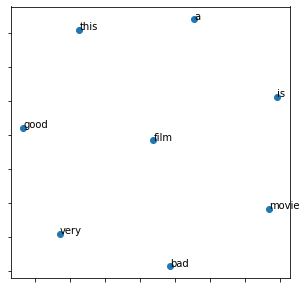

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# 【問題5】コーパスの前処理
コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

In [240]:
#trainデータの中身確認（表示は先頭１０行のみ）
# x_train_imdb[:10]

In [199]:
#NLTKをベースにストップワードを作成
stop_words = ["i've", '', "can't", 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
                          'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 
                          'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
                          'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                          'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
                          'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 
                          'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
                          'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', 
                          "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', 
                          "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
                          "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [236]:
def preprocessing(text):
    #小文字にする
    text_lower = [i.lower() for i in text] 

    #特殊文字（!など）やURL等を削除
    text_del = [re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+$,%#]+)", "" ,i) for i in text_lower] #URL
    text_del = [re.sub(r"<[^>]*?>", "" ,i) for i in text_del] #html
    kigou = '!"#$%&\\\\\()*+,-./:;<=>?@[\\]^_`{|}~「」〔〕“”〈〉『』【】＆＊・（）＄＃＠。、？！｀＋￥％'
    table = str.maketrans('', '', kigou)
    text_del = [i.translate(table) for i in text_del] #記号

    # スペースで単語を分割
    text_split = [re.split(' ', i) for i in text_del]

    # ストップワード削除
    text_pre = []
    for split in text_split:
        split_pre = list(filter(lambda x: x not in stop_words, split))
        text_pre.append(split_pre)
        
    return text_pre

In [243]:
#trainデータ前処理結果　　（表示は先頭１０行のみ）
X_train_pre = preprocessing(x_train_imdb)
print(X_train_pre[:10])

[['zero', 'day', 'leads', 'think', 'even', 'rethink', 'two', 'boysyoung', 'men', 'would', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'classmates', 'captures', 'must', 'beyond', 'bizarre', 'mode', 'two', 'humans', 'decided', 'withdraw', 'common', 'civility', 'order', 'define', 'ownmutual', 'world', 'via', 'coupled', 'destructionit', 'perfect', 'movie', 'given', 'moneytime', 'filmmaker', 'actors', 'remarkable', 'product', 'terms', 'explaining', 'motives', 'actions', 'two', 'young', 'suicidemurderers', 'better', "'elephant'", 'terms', 'film', 'gets', "'rationalistic'", 'skin', 'far', 'far', 'better', 'film', 'almost', 'anything', 'likely', 'see', 'flawed', 'honest', 'terrible', 'honesty'], ['words', 'describe', 'bad', 'movie', 'explain', 'writing', 'see', 'get', 'grip', 'horrible', 'movie', 'really', 'recommend', 'many', 'clichés', 'mistakes', 'negative', 'things', 'imagine', 'make', 'cry', 'start', 'technical', 'first', 'lot', 'mistakes', 'regarding', 'airplane', 'list', 'ment

[['zero', 'day', 'leads', 'think', 'even', 'rethink', 'two', 'boysyoung', 'men', 'would', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'classmates', 'captures', 'must', 'beyond', 'bizarre', 'mode', 'two', 'humans', 'decided', 'withdraw', 'common', 'civility', 'order', 'define', 'ownmutual', 'world', 'via', 'coupled', 'destructionit', 'perfect', 'movie', 'given', 'moneytime', 'filmmaker', 'actors', 'remarkable', 'product', 'terms', 'explaining', 'motives', 'actions', 'two', 'young', 'suicidemurderers', 'better', "'elephant'", 'terms', 'film', 'gets', "'rationalistic'", 'skin', 'far', 'far', 'better', 'film', 'almost', 'anything', 'likely', 'see', 'flawed', 'honest', 'terrible', 'honesty'], ['words', 'describe', 'bad', 'movie', 'explain', 'writing', 'see', 'get', 'grip', 'horrible', 'movie', 'really', 'recommend', 'many', 'clichés', 'mistakes', 'negative', 'things', 'imagine', 'make', 'cry', 'start', 'technical', 'first', 'lot', 'mistakes', 'regarding', 'airplane', 'list', 'ment

In [244]:
#testデータ前処理結果　　（表示は先頭１０行のみ）
X_test_pre = preprocessing(x_test_imdb)
print(X_test_pre[:10])

[['hate', 'heather', 'graham', 'beautiful', 'hate', 'fun', 'watch', 'movie', 'like', 'hip', 'clothing', 'funky', 'surroundings', 'actors', 'flick', 'work', 'well', 'together', 'casey', 'affleck', 'hysterical', 'heather', 'graham', 'literally', 'lights', 'screen', 'minor', 'characters', 'goran', 'visnjic', 'sigh', 'patricia', 'velazquez', 'talented', 'gorgeous', 'congratulations', 'miramax', 'director', 'lisa', 'krueger'], ['know', 'movie', 'received', 'many', 'positive', 'comments', 'one', 'call', 'artistic', 'beautifully', 'filmed', 'things', 'make', 'empty', 'plot', 'filled', 'sexual', 'innuendos', 'wish', 'wasted', 'time', 'watch', 'movie', 'rather', 'biographical', 'poor', 'excuse', 'promoting', 'strange', 'lewd', 'behavior', 'another', 'hollywood', 'attempt', 'convince', 'us', 'kind', 'life', 'normal', 'ok', 'beginning', 'asked', 'self', 'point', 'movieand', 'continued', 'watching', 'hoping', 'would', 'change', 'quite', 'disappointed', 'continued', 'vein', 'glad', 'spend', 'money'

[['hate', 'heather', 'graham', 'beautiful', 'hate', 'fun', 'watch', 'movie', 'like', 'hip', 'clothing', 'funky', 'surroundings', 'actors', 'flick', 'work', 'well', 'together', 'casey', 'affleck', 'hysterical', 'heather', 'graham', 'literally', 'lights', 'screen', 'minor', 'characters', 'goran', 'visnjic', 'sigh', 'patricia', 'velazquez', 'talented', 'gorgeous', 'congratulations', 'miramax', 'director', 'lisa', 'krueger'], ['know', 'movie', 'received', 'many', 'positive', 'comments', 'one', 'call', 'artistic', 'beautifully', 'filmed', 'things', 'make', 'empty', 'plot', 'filled', 'sexual', 'innuendos', 'wish', 'wasted', 'time', 'watch', 'movie', 'rather', 'biographical', 'poor', 'excuse', 'promoting', 'strange', 'lewd', 'behavior', 'another', 'hollywood', 'attempt', 'convince', 'us', 'kind', 'life', 'normal', 'ok', 'beginning', 'asked', 'self', 'point', 'movieand', 'continued', 'watching', 'hoping', 'would', 'change', 'quite', 'disappointed', 'continued', 'vein', 'glad', 'spend', 'money'

# 【問題6】Word2Vecの学習
Word2Vecの学習を行なってください。

In [216]:
#trainデータ
model = Word2Vec(min_count=1, size=10, sg = 1, max_final_vocab=5000) # 次元数を10に設定
model.build_vocab(X_train_pre) # 準備
model.train(X_train_pre, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


語彙の一覧 : dict_keys(['zero', 'day', 'leads', 'think', 'even', 'two', 'men', 'would', 'commit', 'suicide', 'via', 'captures', 'must', 'beyond', 'bizarre', 'humans', 'decided', 'common', 'order', 'world', 'perfect', 'movie', 'given', 'filmmaker', 'actors', 'remarkable', 'product', 'terms', 'explaining', 'motives', 'actions', 'young', 'better', 'film', 'gets', 'skin', 'far', 'almost', 'anything', 'likely', 'see', 'flawed', 'honest', 'terrible', 'honesty', 'words', 'describe', 'bad', 'explain', 'writing', 'get', 'horrible', 'really', 'recommend', 'many', 'clichés', 'mistakes', 'negative', 'things', 'imagine', 'make', 'cry', 'start', 'technical', 'first', 'lot', 'regarding', 'airplane', 'list', 'mention', 'plane', 'manage', 'show', 'colors', 'fictional', 'instead', 'used', 'painted', 'original', 'plot', 'stupid', 'done', 'times', 'much', 'ridiculous', 'moments', 'lost', 'count', 'early', 'also', 'side', 'time', 'good', 'guys', 'executive', 'decision', 'without', 'doubt', 'choice', 'one', 'fac

 -0.02672447  0.0199443  -0.09826661  0.353337  ]
daviesのベクトル : 
[ 0.23062927 -0.7942828   0.33276466 -1.262204    0.28107667 -0.70993406
 -0.1779011  -0.35735953 -0.33115768  0.33062473]
billyのベクトル : 
[ 0.10739082 -0.9957007   0.2144506  -0.8925495   0.4983121  -0.49031672
  0.39188036 -0.01158417  0.1602932   0.25603923]
charmingのベクトル : 
[ 0.01877159 -0.51416796 -0.38848457 -1.224171    0.2053727  -0.34481177
 -0.06666929 -0.15416978 -0.9955167   0.4025441 ]
whoseのベクトル : 
[ 0.21607727 -1.0868909  -0.10449921 -0.62021726  0.3020671   0.14858027
 -0.11891823 -0.75035983 -0.25432912 -0.12733568]
talkのベクトル : 
[-0.11716578 -0.8836671  -0.7370101  -0.30710253 -0.06770714  0.15354262
 -0.14244097  0.26959777  0.23904604  0.427606  ]
tryingのベクトル : 
[-0.10396856 -1.113852   -0.33229223 -0.1806644  -0.2688896   0.31393573
  0.13866012  0.0225169   0.19950035  0.30813798]
successのベクトル : 
[ 0.677515   -0.8403412   0.4327313  -0.46717638 -0.32382402 -0.04109547
 -0.61480004 -0.075771    0.0877305

  0.18374775  0.41865474 -0.73412186  0.24846591]
greyのベクトル : 
[ 0.4874947  -0.48169047 -0.01557864 -0.7204832   0.5279487   0.17882682
 -0.61363256  0.0835245  -0.45169294  0.1802584 ]
surprisingのベクトル : 
[-0.03227602 -0.61955345  0.0014517  -0.70879656 -0.2683299   0.09557951
 -0.3365677   0.24955128 -0.6250471  -0.04367233]
friendsのベクトル : 
[ 0.35745317 -0.8863054  -0.7426351  -0.20358004  0.37325606 -0.19081481
 -0.26602915  0.23744193  0.23205304  0.62727344]
famousのベクトル : 
[ 0.29323736 -0.66956794  0.23130533 -0.9471099   0.40698653 -0.00274554
 -0.42399263 -0.14342612 -0.05079668 -0.04853687]
turningのベクトル : 
[ 0.36911073 -0.7960379  -0.23137622 -0.16775581  0.04528202  0.5718919
  0.09342267  0.3485537  -0.20560004  0.15077281]
parのベクトル : 
[-0.3645336  -0.49922937  0.34478694 -1.1628238  -0.28242466  0.18016997
 -0.21337551  0.66092634 -0.1171432  -0.19887175]
horriblyのベクトル : 
[-0.78201777 -0.8363211  -0.08471116 -0.6048338   0.3788087   0.6560542
 -0.17207246  0.49539292 -0.01346

 -0.3762186  -0.04929822 -0.07615872 -0.24546148]
suggestsのベクトル : 
[ 0.21537113 -1.0553347  -0.04421545 -0.02133051  0.32102954  0.1750057
 -0.03232887  0.21008027 -0.31766284  0.02125907]
bagのベクトル : 
[ 0.25928685 -0.9047141  -0.24692956 -0.32062256 -0.03210148  0.10041023
  0.531095    0.6507562   0.36977178  0.08214853]
ritterのベクトル : 
[-0.07805909 -1.4218009   0.33298394 -0.648517    0.5604193  -0.9092239
  0.00802267 -0.4308155  -0.56057423  0.16362719]
tiredのベクトル : 
[-0.1642943  -0.59467334 -0.62050223 -0.5968908   0.0146631   0.15469165
 -0.25604853  0.5457919   0.03649772  0.31848332]
anybodyのベクトル : 
[-0.24059379 -0.99644697  0.04611563 -0.12238299 -0.43330812  0.28547838
 -0.14122705  0.42410463  0.02651365  1.0562403 ]
drawsのベクトル : 
[ 0.46906713 -0.7006683  -0.07367704 -0.47750062 -0.32309744  0.3058385
  0.07336483  0.05447892 -0.8836151   0.06034678]
trashyのベクトル : 
[-0.10470277 -0.28525743  0.02066726 -1.2282039  -0.5712797   0.3269226
  0.24816355  0.7905878  -0.09705073  0.

keyのベクトル : 
[ 0.23870324 -0.86058676 -0.068521   -0.29591015 -0.11296341  0.29657426
 -0.25092435  0.15042111 -0.5402542  -0.5417456 ]
helpsのベクトル : 
[ 0.32447234 -0.92615116 -0.20495987 -0.4678618  -0.29986173  0.07006889
  0.17683078 -0.20729129 -0.5241769  -0.07399684]
portrayのベクトル : 
[-0.28111383 -1.1000285  -0.22890103 -0.70302737 -0.5790721   0.1384455
 -0.40318832 -0.8126871  -0.13838102  0.17250112]
woman'sのベクトル : 
[ 0.684072   -1.023243   -0.47010016 -0.15648066  0.25823906  0.4591704
  0.3092809  -0.27986646 -0.4727508   0.10076884]
fearのベクトル : 
[ 0.6465722  -0.7599628  -0.32115152 -0.1684304  -0.40399528  0.55406004
  0.03046631  0.03678262 -0.51079375  0.3281342 ]
narrationのベクトル : 
[ 0.16664116 -0.55489284 -0.15098117 -0.4559559   0.0014484   0.32738584
 -0.37788144  0.65370035 -0.8480286  -0.47922105]
advancedのベクトル : 
[ 0.6232244  -0.69516474  0.0659489  -0.16894048 -0.11849666  1.0330833
 -0.9001411   0.2381386   0.3353419  -0.0568275 ]
shotsのベクトル : 
[ 0.5386307  -0.505283

 -0.05599124 -0.3250814   0.16682424  0.30791712]
roundのベクトル : 
[ 0.19623315 -0.8604106  -0.08411893 -0.5478653   0.1263232  -0.17963451
  0.24936806  0.41850623  0.15189585 -0.11480509]
embarrassedのベクトル : 
[-0.7056173  -1.0409981  -0.16726999 -0.4102155  -0.07817454 -0.42686033
 -0.26436645  0.5530034   0.03767042  0.7473237 ]
thanksのベクトル : 
[ 0.2796001  -0.7406242   0.20771408 -0.55099803 -0.03653673 -0.10709016
 -0.13971876  0.32423684 -0.26202378 -0.08072924]
stereotypesのベクトル : 
[-0.3763126  -0.5385851  -0.80653286 -1.1631397  -0.63168514  0.82455283
 -0.55234206 -0.37054002  0.31018415 -0.02600372]
dressのベクトル : 
[ 0.6148378  -0.5190366  -0.55177    -0.8716777   0.22442654  0.18600185
  0.36214823  0.3383509   0.26115417  0.03257199]
stripのベクトル : 
[ 0.5823093  -0.6836753  -0.13991487 -0.68373287  0.36196634  0.06930934
  0.35172063  0.2985309   0.02782508  0.0709028 ]
equivalentのベクトル : 
[ 0.57265604 -0.6167304   0.20314562 -0.5587619  -0.41963127  0.46837065
 -0.3521706   0.2970504

 -0.40561384 -0.06994981 -0.03979639  0.09145547]
7のベクトル : 
[ 0.19791736 -0.97785676 -0.20597892 -0.3448928  -0.0870586  -0.9111531
 -0.8594396   0.8430797   0.7210819  -0.02067503]
kickのベクトル : 
[ 0.34210938 -0.84740794 -0.38376746 -0.52374923 -0.17044778 -0.4652442
  0.53752875  0.9223673   0.5955773   0.535168  ]
frequentlyのベクトル : 
[ 0.09112316 -0.6391771  -0.11145858 -0.6888685  -0.18934005  0.26101664
 -0.33053565  0.16321866 -0.12020707 -0.20959243]
rareのベクトル : 
[ 0.48151222 -0.4768387  -0.0429179  -0.65528196 -0.44116294 -0.12485295
 -0.5003005   0.34142548 -0.37943035  0.38401654]
offersのベクトル : 
[ 0.44116443 -0.79236746  0.05556513 -0.38836354 -0.28259936  0.14088987
  0.04907018  0.07239982 -0.6052412   0.05281943]
laughsのベクトル : 
[-0.12876342 -0.5959777  -0.61314446 -0.8377532  -0.5735027  -0.45327982
  0.19308834  0.8185178  -0.14504594  0.3893644 ]
christopherのベクトル : 
[-0.3582538  -1.0509199   0.45988297 -1.2558182   0.50466454 -0.41325188
  0.5718564  -0.06738734 -0.13276598

  1.7655179e-01 -1.7716651e-01]
guessedのベクトル : 
[-0.15517995 -0.86648023 -0.21789941 -0.22202887  0.46627638  0.39716518
 -0.10867888  0.55799234  0.00230644  0.31054974]
clubのベクトル : 
[ 0.7460848  -0.8182646  -0.37239224 -0.48573917  0.3147995   0.07497606
  0.18945585  0.11864133  0.37535635 -0.01256872]
mst3kのベクトル : 
[-0.10619637 -0.77495605  0.3428609  -0.46242175 -0.21517645 -0.3734341
 -0.7681206   1.1356299   0.43641067  0.45010963]
anymoreのベクトル : 
[-0.18207286 -0.8085658  -0.43690896 -0.31686762 -0.14957987  0.03854962
 -0.44860482  0.49107304  0.23059344  0.8869072 ]
urgeのベクトル : 
[ 0.5265401  -0.9205805  -0.20874833  0.25206396 -0.54860806 -0.13675462
 -0.35396752  0.93981534 -0.01708194  0.87069124]
dogのベクトル : 
[ 0.3670618  -0.745831   -0.44606587 -0.5100794   0.31498706  0.33768323
  0.7041627   0.4307141   0.10813271  0.5787288 ]
satanのベクトル : 
[ 0.12841101 -0.8465133  -0.3048107  -0.42757598  0.32170683  0.8334424
  0.37996626  0.08843675  0.28035194  0.5272229 ]
previousのベク

 -0.7024      0.3178022   0.2336309   0.43396723]
borrowedのベクトル : 
[ 0.19760412 -0.56562835  0.41553026 -0.5731305   0.42641777  0.258454
 -0.46866643  0.7613975   0.23137088  0.16987745]
navyのベクトル : 
[ 0.8761359  -1.0917544  -0.0677461  -0.5297402   0.41039175 -0.03893496
 -0.3807282  -0.7471401  -0.03212964 -0.30349085]
elizabethのベクトル : 
[ 0.20665634 -1.1039286   0.00240682 -0.91635466  0.6239806  -0.70194995
  0.15412273 -0.41816968 -0.32315108  0.12611511]
libraryのベクトル : 
[ 0.6166901  -0.8395381   0.7327545  -0.01944007  0.49046585  0.21522948
 -0.5844898   1.0165555   0.28329393  0.6215392 ]
bottleのベクトル : 
[ 0.7108793  -0.92009664 -0.3459898  -0.23778509  0.38128078 -0.01440459
  0.7831987   0.763902    0.24076308  0.17420219]
appreciatedのベクトル : 
[ 0.3183549  -0.58821493 -0.0050745  -0.4621752  -0.4533356  -0.03672544
 -0.87407744  0.2055632  -0.57385236  0.50246054]
murphyのベクトル : 
[-0.09763449 -0.7126688   0.00382046 -1.2293062   0.4812561  -0.79819477
  0.24848945  0.30863422  0

laurelのベクトル : 
[ 0.2636278  -0.6378267   0.338285   -1.5361266   0.20696609 -0.5136672
 -0.4364413   0.0221869   0.92834455  0.17756666]
hardyのベクトル : 
[ 0.3670769  -0.7243907   0.3747214  -1.5102435   0.29475728 -0.6304261
 -0.35013765 -0.13649954  0.8441902   0.1738429 ]
aidのベクトル : 
[ 0.53027356 -1.0747608  -0.26154402 -0.29439545  0.36362416  0.5826774
  0.25637    -0.3544902   0.0209594  -0.15693143]
assumeのベクトル : 
[-0.26208988 -0.97800773  0.00364273 -0.22499774 -0.09919126  0.39536247
 -0.54393893  0.16748387  0.31324783  0.3704124 ]
depressedのベクトル : 
[-2.4246044e-02 -1.1286787e+00 -7.6832497e-01 -6.2357478e-02
  1.8839674e-01 -4.0086513e-04 -1.4511628e-02 -1.3893719e-01
 -5.7885373e-01  7.0277214e-01]
universalのベクトル : 
[ 0.7292215  -0.59705096  0.4585085  -0.6331557  -0.29057124  0.5251516
 -0.60893494  0.0205509   0.22691233  0.07561382]
adviseのベクトル : 
[ 0.18271056 -0.96955687  0.00177989  0.16496213 -0.99130887  0.06424078
 -0.22610483  0.93003315 -0.12907691  1.3005879 ]
lucky

  0.42801875  0.3483622  -0.0361078   0.11662538]
crucialのベクトル : 
[ 0.31435245 -0.83844155 -0.20598227 -0.19416124 -0.18776664  0.38702318
 -0.5988449   0.09065295 -0.6292064  -0.6005772 ]
vagueのベクトル : 
[-0.19887508 -0.8574769  -0.24497317 -0.19986181 -0.24244931  0.7749327
 -0.4670734   0.23933491 -0.46459612 -0.3411996 ]
choreographyのベクトル : 
[ 0.17206706 -0.14491591  0.08027767 -1.6842574  -0.33272326 -0.08541221
  0.155515    0.8632704  -0.35954246 -0.4594691 ]
kennethのベクトル : 
[-0.18741462 -1.2902985   0.85910416 -0.7059026   0.30648306 -0.45823425
  0.23340845 -0.1770972  -0.7448925  -0.1800492 ]
watersのベクトル : 
[ 0.66118836 -0.6756469   0.23071404 -0.7434526   0.2075349  -0.02053024
 -0.09259529 -0.10826657 -0.17712085  0.42329544]
susanのベクトル : 
[ 0.32988366 -1.0506735   0.30273324 -0.8185969   0.83003    -0.5331332
  0.02163172 -0.29387143 -0.48033348  0.03293848]
itiのベクトル : 
[-0.23158593 -0.9748482  -0.19844563 -0.00737097 -0.38315964 -0.30320272
 -0.7386063   1.0144846   0.06559

In [217]:
len(model.wv.vocab.keys())

4939

In [242]:
#testデータ
model_test = Word2Vec(min_count=1, size=10, sg = 1, max_final_vocab=5000) # 次元数を10に設定
model_test.build_vocab(X_test_pre) # 準備
model_test.train(X_test_pre, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model_test.wv.vocab.keys()))
for vocab in model_test.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model_test.wv[vocab]))

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.


語彙の一覧 : dict_keys(['hate', 'graham', 'beautiful', 'fun', 'watch', 'movie', 'like', 'hip', 'clothing', 'surroundings', 'actors', 'flick', 'work', 'well', 'together', 'casey', 'hysterical', 'literally', 'lights', 'screen', 'minor', 'characters', 'patricia', 'talented', 'gorgeous', 'director', 'lisa', 'know', 'received', 'many', 'positive', 'comments', 'one', 'call', 'artistic', 'beautifully', 'filmed', 'things', 'make', 'empty', 'plot', 'filled', 'sexual', 'wish', 'wasted', 'time', 'rather', 'poor', 'excuse', 'strange', 'behavior', 'another', 'hollywood', 'attempt', 'convince', 'us', 'kind', 'life', 'normal', 'ok', 'beginning', 'asked', 'self', 'point', 'continued', 'watching', 'hoping', 'would', 'change', 'quite', 'disappointed', 'glad', 'spend', 'money', 'see', 'theater', 'caught', 'horror', 'channel', 'impressed', "film's", 'gothic', 'atmosphere', 'tone', 'big', 'fan', 'vampire', 'related', 'always', 'happy', 'new', 'case', 'creature', 'dimension', 'done', 'brilliant', 'job', 'dark', 

 -0.31478205  0.0422194  -0.21866639 -0.07484108]
hitのベクトル : 
[ 0.22746946 -0.7001912   0.690694   -0.28319088  0.10597845  0.44331756
  0.2569087   0.30420983  0.23352157 -0.25562513]
liesのベクトル : 
[ 0.33540943 -0.9585937  -0.25784022 -0.61572087  0.10530617  0.13984153
 -0.1945429  -0.21844223 -0.6330878   0.16434403]
happenedのベクトル : 
[ 0.25900263 -1.1045227   0.3590794  -0.2732195   0.33827573  0.32171738
 -0.19190814 -0.24438684  0.0823268   0.5921087 ]
muchのベクトル : 
[-0.02280209 -0.9141947   0.09750084 -0.23966704  0.05466695  0.00943224
 -0.46419328  0.50944805  0.0052398   0.1041741 ]
careerのベクトル : 
[ 0.08644649 -0.88282436 -0.03943844 -0.5612492   0.5465333   0.06689871
 -0.0529124   0.11016745  0.36672676 -0.59267384]
shameのベクトル : 
[ 0.09101886 -0.6953133   0.1471742  -0.49361393  0.43163478  0.17177305
 -0.49679637  0.65406203  0.26999673 -0.06011533]
faultのベクトル : 
[-0.1397335  -1.0684277  -0.5269084  -0.37844807  0.3735742   0.48343912
 -0.7713005   0.23195969 -0.03539259  0.0

animalのベクトル : 
[ 0.10256455 -0.7626199   0.62355745 -0.5459018  -0.664174   -0.07196579
  0.39711064  0.17055675 -0.11944225  0.04086668]
changingのベクトル : 
[ 0.88865805 -0.7517171   0.09432369 -0.24169974 -0.27950078  0.13098332
 -0.2187358   0.26814792 -0.23160206  0.02698208]
ideasのベクトル : 
[ 0.39877036 -0.70344734 -0.00775333 -0.6611241  -0.3477959   0.07693636
 -0.65798783  0.23766556 -0.06599799  0.13455316]
universeのベクトル : 
[ 0.27474517 -0.67445004  0.16690375 -0.956203   -0.21176118  0.27115008
 -0.10216098 -0.02878992 -0.30831602  0.46687365]
scienceのベクトル : 
[ 0.13475038 -0.44214904  0.71146184 -1.4260969  -0.29656786 -0.07378469
 -0.36421087  0.27009964 -0.46549135  0.9634918 ]
viewのベクトル : 
[ 0.80500567 -0.855225   -0.30699098 -0.45225713 -0.02001595 -0.15688346
 -0.35107902  0.51078635 -0.00147194  0.25909707]
repeatのベクトル : 
[ 0.17488697 -0.88038653  0.24773483 -0.25527847  0.11972388  0.11115927
 -0.6492125   0.3854407   0.18012519  0.32881713]
fictionのベクトル : 
[-0.18104815 -0.

  0.64254254  0.00386016 -0.1893856  -0.64963067]
greyのベクトル : 
[ 0.04377589 -0.890092    0.07852807 -0.26588064  0.3079845  -0.06541421
  0.08576628  0.17308545 -0.6001055  -0.7376557 ]
villainのベクトル : 
[-0.80533504 -1.0159961   0.30400676 -0.50784546 -0.2115065   0.10759046
 -0.16827855 -0.18346365 -0.27191222 -0.663036  ]
reactionのベクトル : 
[ 0.34841347 -1.0759511  -0.1374245  -0.18236053 -0.09360325  0.01389679
 -0.25598615  0.02927309  0.07403731  0.06058838]
explainingのベクトル : 
[ 0.23542391 -1.0785106  -0.06650041 -0.13353677  0.03238924  0.82859373
 -0.59108347 -0.22192736 -0.01215888  0.22942613]
wearingのベクトル : 
[-0.2174599  -0.808473    0.79044324 -0.13045496 -0.9934392   0.7750098
  0.34773317  0.22014727 -0.07317472 -0.57574534]
knewのベクトル : 
[ 0.03562005 -0.9929991   0.31750894 -0.2882772   0.5699222   0.33627856
 -0.18324673  0.21703564  0.25426     0.39818892]
cleverlyのベクトル : 
[ 0.15152165 -0.7976877  -0.18890963 -0.72845674 -0.12112956 -0.08978945
 -0.8796514  -0.05856882 -0.4

 -0.05111978  0.03619023 -0.46675006  0.2185232 ]
suspectのベクトル : 
[ 0.07344124 -0.8891642  -0.06200026 -0.649618    0.18843512  0.3847087
 -0.08261585 -0.094111   -0.00842075  0.03169856]
sentのベクトル : 
[ 0.45879132 -0.83497465  0.20170759 -0.8858619   0.07370166  1.0499076
  0.8215003  -0.32023472  0.27289212 -0.00872574]
beatのベクトル : 
[-0.17576131 -0.83083504  0.34952664 -0.28361768 -0.2395689   0.41783276
  0.29004568  0.5135458   0.06724501 -0.08053646]
fantasticのベクトル : 
[ 0.05025082 -0.6995032   0.32430327 -0.2032715   0.47579822 -0.11587169
 -0.5153265   0.6331354  -0.4470678  -0.7640392 ]
bringingのベクトル : 
[ 0.41396582 -0.7744003  -0.22311735 -0.64893305  0.19748378  0.10701745
  0.24359782  0.22208515 -0.3270235  -0.4130773 ]
mixのベクトル : 
[-0.02680887 -0.57897705  0.46268463 -0.5426128  -0.6001663  -0.15967977
 -0.3766799   0.57643324 -0.484237   -0.3463898 ]
muddledのベクトル : 
[ 0.10634629 -0.96401787 -0.22572    -0.47472984 -0.37245536  0.23698674
 -1.502582    0.04866296 -0.57426876

 -0.15034708  0.09509994  0.5106547  -0.02227947]
vanのベクトル : 
[-0.57990974 -0.61475337  0.85396564 -0.5929806   0.04662354  0.5940343
  0.11956635  0.20985836  0.08814159 -0.69487906]
giantのベクトル : 
[-0.15385275 -0.53224736  1.1874777  -0.6446211  -0.74573934  0.8022819
  0.0415772  -0.05317254 -0.0943535  -0.08551732]
projectのベクトル : 
[-0.01773699 -0.61309606 -0.07254855 -0.9596963   0.24674451  0.7393204
 -0.0775369   0.35873866  0.25296354  0.02916182]
fascinatingのベクトル : 
[ 0.6999754  -0.7873402  -0.00539798 -0.5086663   0.08203674 -0.48692995
 -0.4148054   0.2010533  -0.6181986  -0.18228595]
listenのベクトル : 
[-0.04577182 -0.7825416   0.34344104 -0.13070394  0.39053327  0.41827884
 -0.09256926  0.78407997 -0.8069639   0.2332816 ]
extendedのベクトル : 
[ 0.9179036  -0.7261772   0.5645781  -0.08251343  0.01765968 -0.01417671
 -0.42161468  0.01938613 -0.2139649  -0.25990567]
attentionのベクトル : 
[ 0.7723106  -0.87994003 -0.35147342  0.18805528  0.28154427  0.5352629
 -0.3141735   0.8439662  -0.218

 -0.01083004  0.51184595  0.13554761  0.4147067 ]
obsessionのベクトル : 
[ 0.36857158 -0.9111089  -0.09904873 -0.7322679  -0.4752074  -0.26841092
  0.31157994 -0.18286967 -0.4412573  -0.18770333]
attractionのベクトル : 
[ 0.5777964  -1.2071165  -0.09312338 -0.11733586 -0.1085254  -0.38839167
  0.1417618  -0.23204109 -0.22014189 -0.3911083 ]
snakesのベクトル : 
[-3.47774215e-02 -6.54419482e-01  1.11819720e+00 -3.55752558e-01
 -9.92073655e-01  1.06649613e+00  1.15055445e-05  3.05834949e-01
  1.53906897e-01  2.39365295e-01]
trainのベクトル : 
[ 0.53813356 -0.63218653  0.8675069  -0.12356474 -0.14943442  1.1003062
  0.20786093 -0.01496692 -0.21059342 -0.40704665]
planeのベクトル : 
[ 0.5365281  -0.652702    0.7486338  -0.49606818 -0.27642474  1.3849523
  0.04091055 -0.241325   -0.02595187  0.17248052]
makersのベクトル : 
[ 0.14000672 -0.7902628  -0.22078666 -0.7613593   0.0738653   0.30507573
 -0.37685436  0.72528243  0.2933834   0.64410573]
unbearableのベクトル : 
[ 0.14969161 -0.9517578   0.14179903 -0.18002841 -0.1075758

 -0.5920114  -0.03641422 -0.2010477   0.55279773]
legalのベクトル : 
[ 0.4685041  -0.91445476 -0.54521513 -0.8821823  -0.02443808  0.18806647
  0.28282937  0.07463697  0.19638036  0.11801808]
speakingのベクトル : 
[-0.18542029 -0.677907    0.0667114  -0.81505656 -0.18613902  0.17804892
 -0.34540415  0.20633313 -0.36718044 -0.11123568]
coversのベクトル : 
[ 0.8521718  -0.65034914  0.22259031 -0.40798518 -0.11884793  0.2501614
 -0.14054783  0.1779408  -0.26057902 -0.05805619]
irrelevantのベクトル : 
[ 0.27736452 -0.96001107  0.05511134 -0.36376634 -0.46652567  0.06628269
 -1.2067584  -0.05558797 -0.18887588  0.15227105]
strangelyのベクトル : 
[ 2.6331899e-01 -8.8159144e-01  2.6460788e-01 -2.0071866e-01
 -3.3259583e-01 -1.0389909e-01 -2.0802525e-01  6.0269068e-04
 -4.0319341e-01 -3.9930055e-01]
overlookedのベクトル : 
[ 0.2888598  -0.80698663  0.03059163 -0.5120163   0.3824428  -0.6098668
 -0.3296847   0.5963477  -0.06985851 -0.24260674]
sleazeのベクトル : 
[-0.07001024 -0.66053957  0.6715663  -0.26966703 -1.177825   -0.38

 -0.22429213  1.1636347   0.03067316  0.491586  ]
installmentのベクトル : 
[ 0.38093624 -0.6722196   1.444981   -0.6360341   0.42774475 -0.18342653
 -0.44015485 -0.31690562  0.35003993  0.04131   ]
hideousのベクトル : 
[ 0.13782315 -0.7982357   0.4351035  -0.30593455 -0.6118683   0.66422945
 -0.30153713 -0.13552149 -0.10193329 -0.02384376]
drivelのベクトル : 
[-0.16825935 -1.0131278   0.06970744 -0.21035755 -0.03776927  0.36200738
 -0.528636    0.47812393  0.34786102  0.45765015]
stiffのベクトル : 
[-0.61759216 -0.96189696 -0.0285553  -0.31551453 -0.2735988   0.4388776
 -0.63844854  0.24633737 -0.17609745 -0.6726092 ]
appallingのベクトル : 
[-0.04316277 -0.58848655 -0.08193126 -0.80477536 -0.03015606  0.5299529
 -1.112606    0.4592545   0.02960188 -0.03823789]
borrowedのベクトル : 
[ 0.38074875 -0.3711534   0.90869254 -0.64181125  0.03110384  0.3886351
 -0.31101507  0.42127204  0.10670722 -0.1308668 ]
amyのベクトル : 
[-0.510128   -1.2714479   0.03089712 -0.19775052  0.530102   -0.09904846
  0.44200352  0.03591397 -0.21

  0.37401512  0.17205295 -0.34776756 -0.2486828 ]
treatmentのベクトル : 
[ 0.46459323 -0.7231602  -0.2794794  -0.7271013   0.06711947  0.09798214
 -0.10263664  0.297941   -0.02887158 -0.10753254]
singのベクトル : 
[-0.06698473 -0.8717059   0.7256512   0.24752496  0.50155205  0.2981488
  0.38828352  0.7274279  -0.6494921  -0.56394494]
derivativeのベクトル : 
[-0.19636126 -0.7002222   0.43278345 -0.55403525 -0.5396474  -0.31786862
 -1.2082845   0.5763345  -0.24926466 -0.09541495]
readsのベクトル : 
[ 0.13927743 -0.89332753  0.23141342 -0.45052314  0.62063295  0.2892887
 -0.04399748 -0.11325417 -0.5034919   0.17756891]
3000のベクトル : 
[ 0.2710434  -0.39938223  1.683225   -1.0210057   0.16704698  0.3596815
 -0.24103875  0.35686046  0.08049714  1.1147645 ]
behaviourのベクトル : 
[ 0.35491297 -1.2097676  -0.6007451  -0.5834292  -0.54147214 -0.32785258
 -0.14582342 -0.15880013 -0.2008287   0.1775325 ]
revelationのベクトル : 
[ 0.32692754 -1.170489   -0.06369411 -0.12681621  0.19265233  0.06806225
 -0.3708907  -0.3974456  -0.

# 【問題7】（アドバンス課題）ベクトルの可視化
得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/takahashihideyuki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


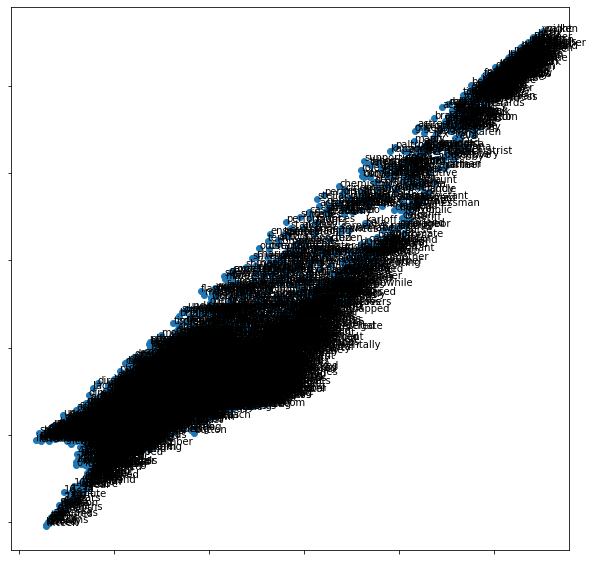

In [218]:
#trainデータ
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=250, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [223]:
model.wv.most_similar(positive="good", topn=6)

[('watchable', 0.9566829204559326),
 ('absolutely', 0.9533154368400574),
 ('decent', 0.9351400136947632),
 ('expected', 0.9291649460792542),
 ('add', 0.9281890392303467),
 ('well', 0.9259172677993774)]

In [224]:
model.wv.most_similar(positive="men", topn=6)

[('women', 0.9633299708366394),
 ('drugs', 0.9363841414451599),
 ('parties', 0.9339209198951721),
 ('drug', 0.9228876829147339),
 ('trained', 0.9157016277313232),
 ('heroes', 0.9150741100311279)]

In [225]:
model.wv.most_similar(positive="big", topn=6)

[('game', 0.9580615162849426),
 ('huge', 0.9545034170150757),
 ('belongs', 0.931091845035553),
 ('super', 0.9198291301727295),
 ('camp', 0.9159123301506042),
 ('belong', 0.9137893915176392)]

### 似ている単語を調べた結果は3分の1程度は当たっていそう。

# 【問題8】（アドバンス課題）Word2Vecを用いた映画レビューの分類
問題6で学習して得たベクトルや公開されている学習済みベクトルを用いてIMDB映画レビューデータセットの感情分類の学習・推定を行なってください。

### 回答無し